In [1]:
from HeaderP import *

In [23]:
import numpy as np
import matplotlib.pyplot as plt
def Randomwalk1D(n, timestep): #n here is the no. of steps that we require
    x = 0
    y = 0
    xposition = [0] #starting from origin (0,0)
    yposition = [0] 

    for i in range (1,n+1):
        step = np.random.uniform(0,1)

        if step < 0.5: # if step is less than 0.5 we move up    
            x += timestep
            y += 1*np.sqrt(timestep)  #moving up in u direction

        if step > 0.5: # if step is greater than 0.5 we move down  
            x += timestep
            y += -1*np.sqrt(timestep) #moving down in y direction

        xposition.append(x)
        yposition.append(y)
    return [xposition,yposition]


Text(0, 0.5, 'dR')

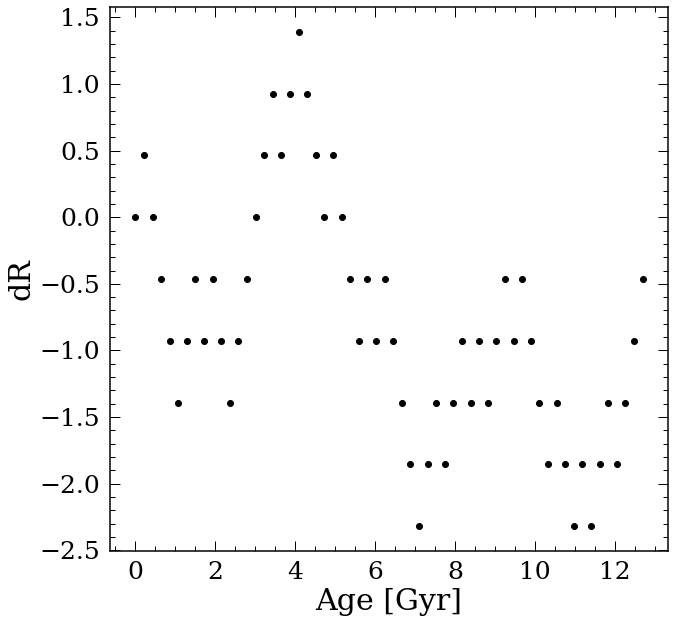

In [80]:
x, y = Randomwalk1D(59, 0.215)
plt.plot(x,y,'ko')
plt.xlabel('Age [Gyr]')
plt.ylabel('dR')

<ipython-input-81-e50a424a3e68>:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
<ipython-input-81-e50a424a3e68>:22: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)


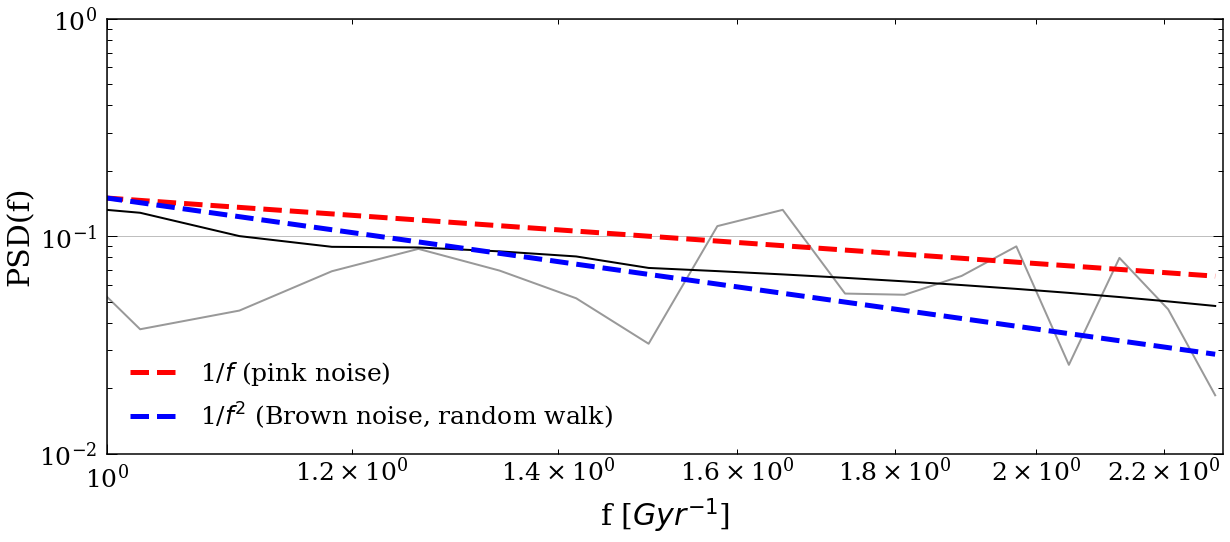

In [81]:
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

N = len(x)
T = max(x)/N
yf = fft(y)

xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(20,8))
PSD = 2.0/N * np.abs(yf[0:N//2])
plt.loglog(xf,PSD,'k-',alpha=0.4)

#PSD_smooth = gaussian_filter1d(PSD, 5)
PSD_smooth = savgol_filter(PSD, 21, 1)
plt.loglog(xf,PSD_smooth,'k-')

A = 0.15
plt.plot(xf, A/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
plt.plot(xf, A/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)
plt.grid()
plt.xlim([1,2.3])
plt.ylim([1e-2,1])
plt.xlabel('f [$Gyr^{-1}$]')
plt.ylabel('PSD(f)')
plt.legend(loc=3)

# Generate 1000 particles

In [82]:
ages, drs = np.zeros((1000,60)), np.zeros((1000,60))
for i in range(1000):
    ages[i,:], drs[i,:] = Randomwalk1D(59, 0.215)
    

In [83]:
age_flat, drs_flat = ages.ravel(), drs.ravel()
print(np.shape(age_flat))

(60000,)


Text(0, 0.5, 'ΔR [kpc]')

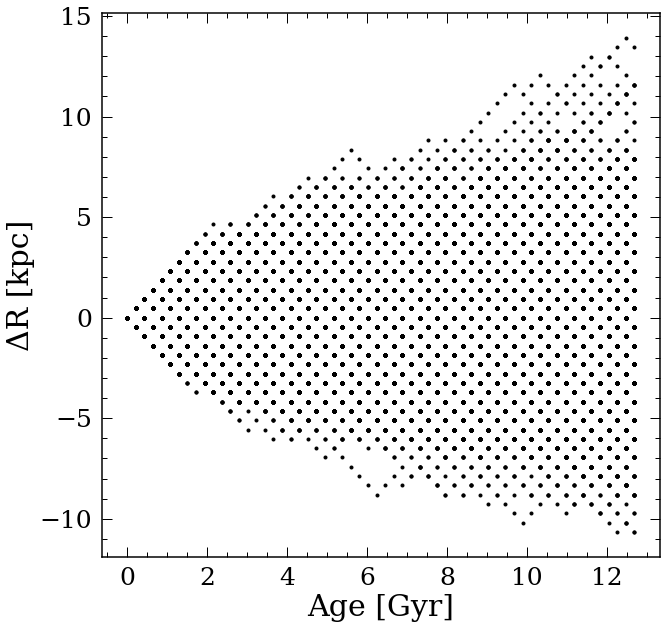

In [87]:
plt.plot(age_flat, drs_flat,'k.')
plt.xlabel('Age [Gyr]')
plt.ylabel('ΔR [kpc]')

<ipython-input-92-e0fbe05334ee>:16: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
<ipython-input-92-e0fbe05334ee>:17: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A*50/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)


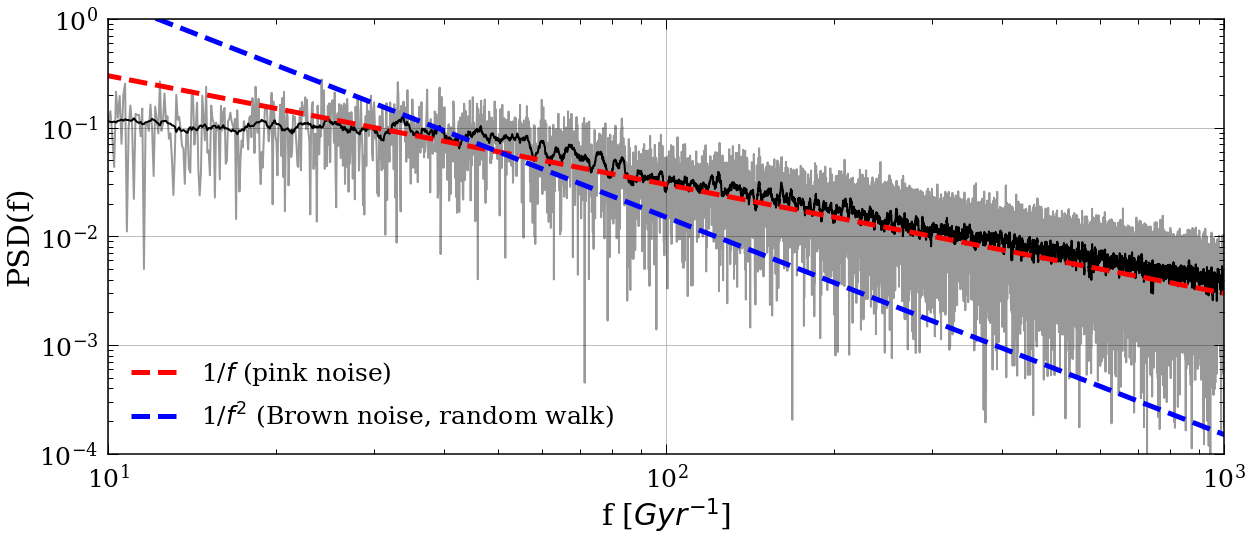

In [92]:
N = len(age_flat)
T = max(age_flat)/N
yf = fft(drs_flat)

xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(20,8))
PSD = 2.0/N * np.abs(yf[0:N//2])
plt.loglog(xf,PSD,'k-',alpha=0.4)

#PSD_smooth = gaussian_filter1d(PSD, 5)
PSD_smooth = savgol_filter(PSD, 21, 1)
plt.loglog(xf,PSD_smooth,'k-')

A = 3
plt.plot(xf, A/xf, 'r--',label='1/$f$ (pink noise)',linewidth=5)
plt.plot(xf, A*50/xf**2, 'b--',label='1/$f^2$ (Brown noise, random walk)',linewidth=5)
plt.grid()
plt.xlim([10,1e3])
plt.ylim([1e-4,1])
plt.xlabel('f [$Gyr^{-1}$]')
plt.ylabel('PSD(f)')
plt.legend(loc=3)